In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [3]:
sentiment_df=pd.read_csv('/content/fear_greed_index.csv')
trade_df= pd.read_csv('/content/historical_data.csv')

/tmp/ipython-input-2051511680.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trade_df= pd.read_csv('/content/historical_data.csv')


In [4]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


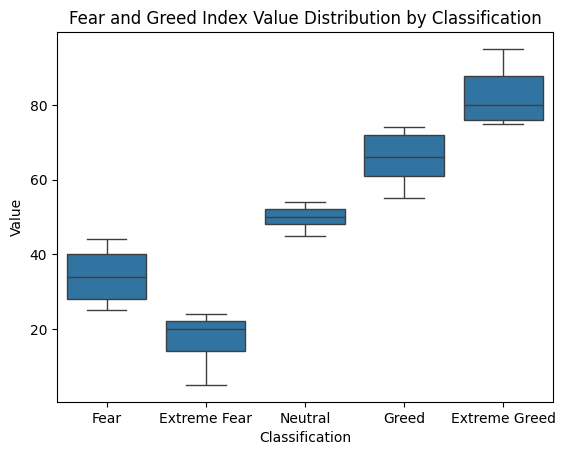

In [5]:
# box plot for value vs classification
sns.boxplot(data=sentiment_df,x='classification',y='value')
plt.title('Fear and Greed Index Value Distribution by Classification')
plt.xlabel('Classification')
plt.ylabel('Value')
plt.show()

In [6]:
trade_df.head(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8,987,7872,BUY,02-12-2024 22:50,0,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0,895000000000000,1730000000000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8,16,128,BUY,02-12-2024 22:50,987,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0,443000000000000,1730000000000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8,144,1151,BUY,02-12-2024 22:50,1003,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0,660000000000000,1730000000000
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8,143,1142,BUY,02-12-2024 22:50,1147,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0,1080000000000000,1730000000000
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8,9,70,BUY,02-12-2024 22:50,1289,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0,1050000000000000,1730000000000
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8,1,11,BUY,02-12-2024 22:50,1298,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0,733000000000000,1730000000000
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8,144,1152,BUY,02-12-2024 22:50,1300,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0,906000000000000,1730000000000
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8,34,272,BUY,02-12-2024 22:50,1444,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0,396000000000000,1730000000000
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8,46,368,BUY,02-12-2024 22:50,1478,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0,946000000000000,1730000000000
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8,12,100,BUY,02-12-2024 22:50,1524,Buy,0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0,34700000000000,1730000000000


In [7]:
trade_df['Direction'].value_counts()

,count
Direction,
Open Long,40013
Close Long,37673
Open Short,29541
Close Short,27260
Buy,9813
Sell,9378
Spot Dust Conversion,126
Short > Long,48
Long > Short,38


In [8]:
trade_df['Side'].value_counts()

,count
Side,
BUY,77136
SELL,76764


In [9]:
trade_df['Calc_Profit'] = np.where(
    (trade_df['Side'] == 'SELL') |
    (trade_df['Direction'].str.contains('Close Long', case=False)) |
    (trade_df['Direction'].str.contains('Open Short', case=False)),

    trade_df['Execution Price'] * trade_df['Size Tokens'],   # money coming IN (sell, open short, close long)

    -trade_df['Execution Price'] * trade_df['Size Tokens']   # money going OUT (buy, open long, close short)
)

columns=['Timestamp IST','Coin','Closed PnL','Fee','Start Position','Direction','Size Tokens','Size USD','Execution Price','Calc_Profit']
trade_df=trade_df[columns]

In [10]:
# Extract date from 'Timestamp IST'
trade_df['date'] = pd.to_datetime(trade_df['Timestamp IST'], errors='coerce').dt.date
trade_df['date'] = pd.to_datetime(trade_df['date'])

# Convert 'date' column in sentiment_df to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Merge the dataframes
merged_df = pd.merge(trade_df, sentiment_df[['date', 'value', 'classification']], on='date', how='left')

# Display the merged dataframe
display(merged_df.head())

,Timestamp IST,Coin,Closed PnL,Fee,Start Position,Direction,Size Tokens,Size USD,Execution Price,Calc_Profit,date,value,classification
0,02-12-2024 22:50,@107,0,0,0,Buy,987,7872,8,-7872,2024-02-12,70,Greed
1,02-12-2024 22:50,@107,0,0,987,Buy,16,128,8,-128,2024-02-12,70,Greed
2,02-12-2024 22:50,@107,0,0,1003,Buy,144,1151,8,-1151,2024-02-12,70,Greed
3,02-12-2024 22:50,@107,0,0,1147,Buy,143,1142,8,-1142,2024-02-12,70,Greed
4,02-12-2024 22:50,@107,0,0,1289,Buy,9,70,8,-70,2024-02-12,70,Greed


In [11]:
merged_df['classification'].value_counts()

,count
classification,
Fear,10774
Greed,10190
Extreme Greed,4032
Extreme Fear,1906
Neutral,1776


In [12]:
merged_df.columns

Index(['Timestamp IST', 'Coin', 'Closed PnL', 'Fee', 'Start Position',
       'Direction', 'Size Tokens', 'Size USD', 'Execution Price',
       'Calc_Profit', 'date', 'value', 'classification'],
      dtype='object')

# Profit

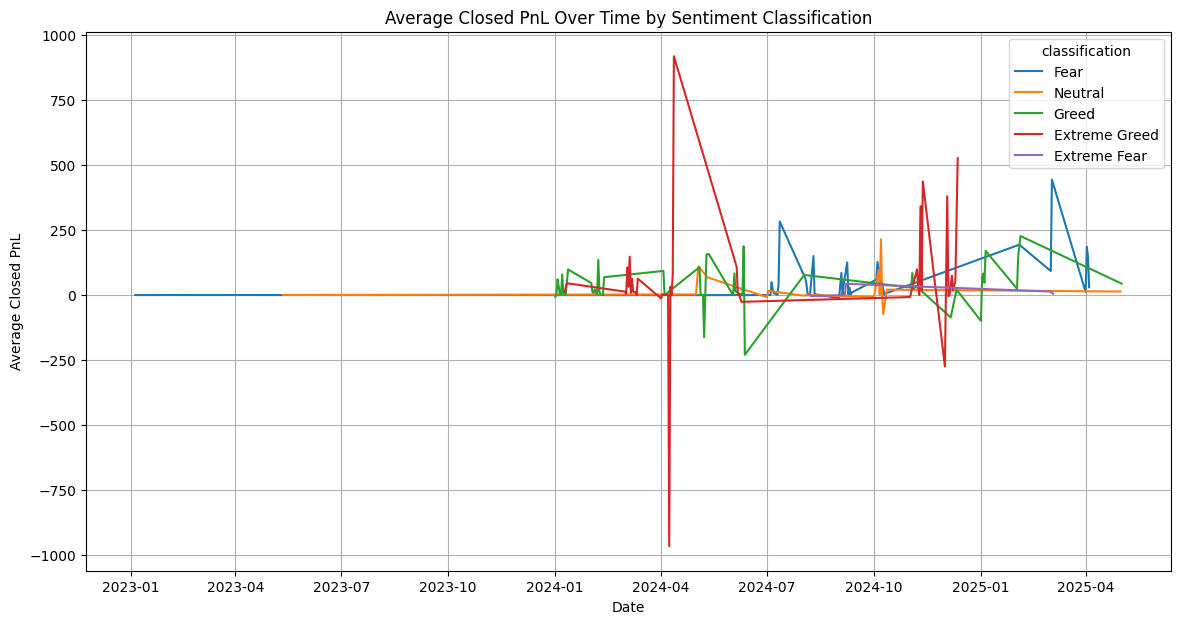

In [13]:
# Group by date and classification and calculate the mean of 'Closed PnL'
profit_sentiment = merged_df.groupby(['date', 'classification'])['Closed PnL'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=profit_sentiment, x='date', y='Closed PnL', hue='classification')
plt.title('Average Closed PnL Over Time by Sentiment Classification')
plt.xlabel('Date')
plt.ylabel('Average Closed PnL')
plt.grid(True)
plt.show()

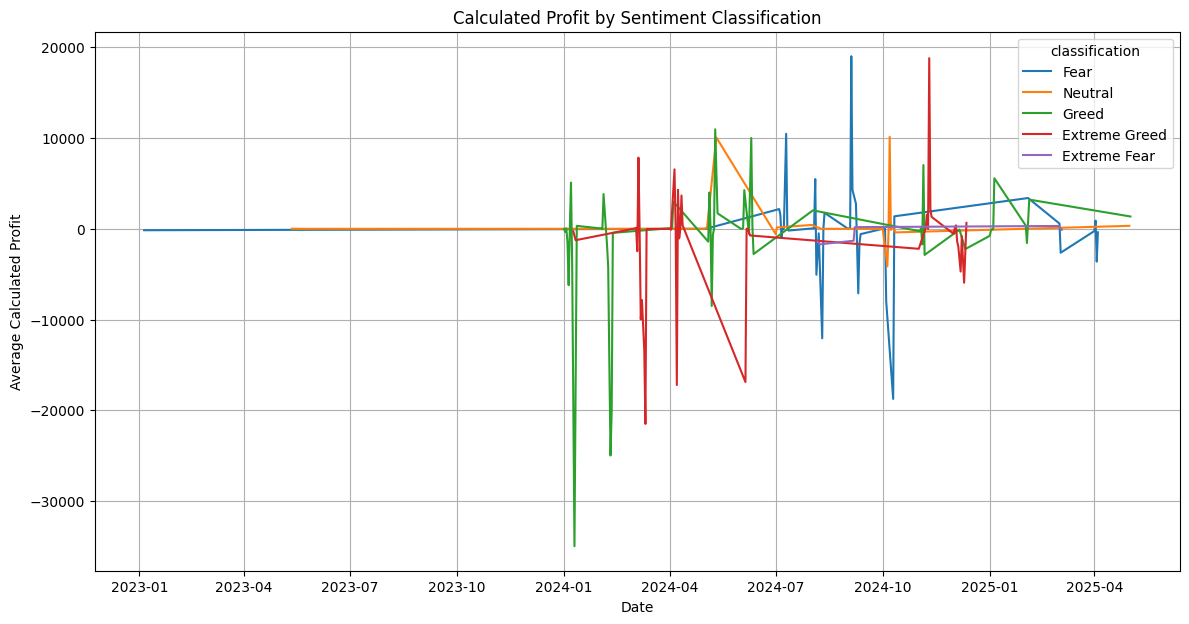

In [14]:
# Group by date and classification and calculate the mean of 'Calc_Profit'
cal_profit_sentiment = merged_df.groupby(['date', 'classification'])['Calc_Profit'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=cal_profit_sentiment, x='date', y='Calc_Profit', hue='classification')
plt.title('Calculated Profit by Sentiment Classification') # Changed title
plt.xlabel('Date')
plt.ylabel('Average Calculated Profit')
plt.grid(True)
plt.show()

# Risk

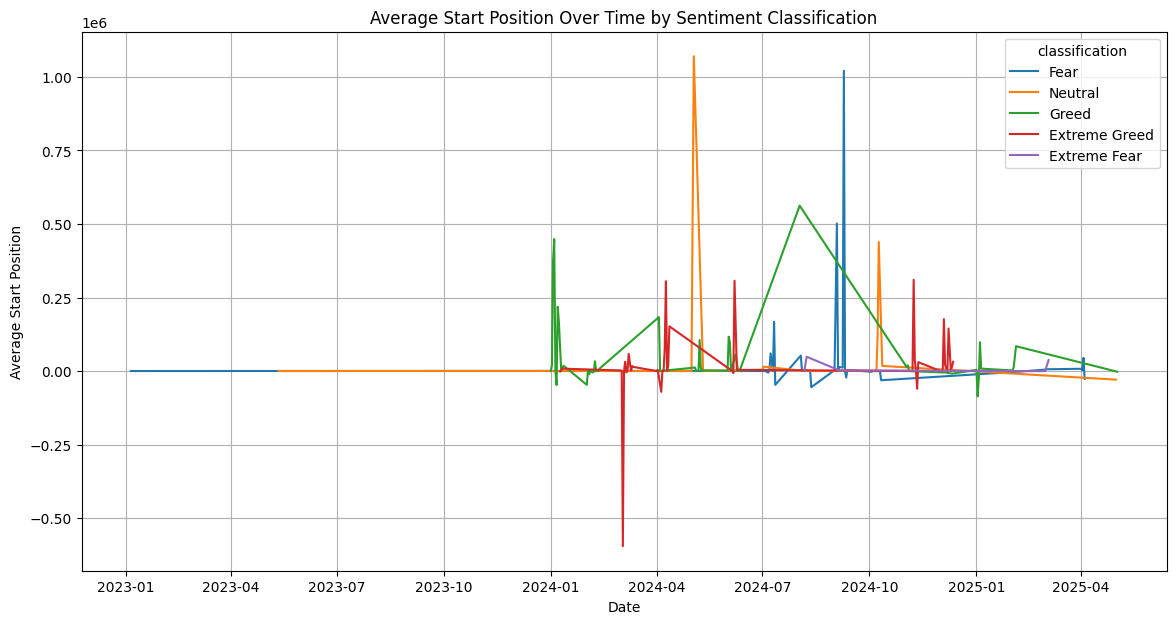

In [15]:
# Ensure 'Start Position' is numeric, coercing errors
merged_df['Start Position'] = pd.to_numeric(merged_df['Start Position'], errors='coerce')

# Drop rows with NaN in 'Start Position' or 'classification' for plotting
plot_df = merged_df.dropna(subset=['Start Position', 'classification'])

# Group by date and classification and calculate the mean of 'Start Position'
Start_Position_sentiment = plot_df.groupby(['date', 'classification'])['Start Position'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=Start_Position_sentiment, x='date', y='Start Position', hue='classification')
plt.title('Average Start Position Over Time by Sentiment Classification') # Updated title
plt.xlabel('Date')
plt.ylabel('Average Start Position') # Updated y-axis label
plt.grid(True)
plt.show()

,Timestamp IST,Coin,Closed PnL,Fee,Start Position,Direction,Size Tokens,Size USD,Execution Price,Calc_Profit,date,value,classification,year
0,02-12-2024 22:50,@107,0,0,0,Buy,987,7872,8,-7872,2024-02-12,70,Greed,2024
1,02-12-2024 22:50,@107,0,0,987,Buy,16,128,8,-128,2024-02-12,70,Greed,2024
2,02-12-2024 22:50,@107,0,0,1003,Buy,144,1151,8,-1151,2024-02-12,70,Greed,2024
3,02-12-2024 22:50,@107,0,0,1147,Buy,143,1142,8,-1142,2024-02-12,70,Greed,2024
4,02-12-2024 22:50,@107,0,0,1289,Buy,9,70,8,-70,2024-02-12,70,Greed,2024


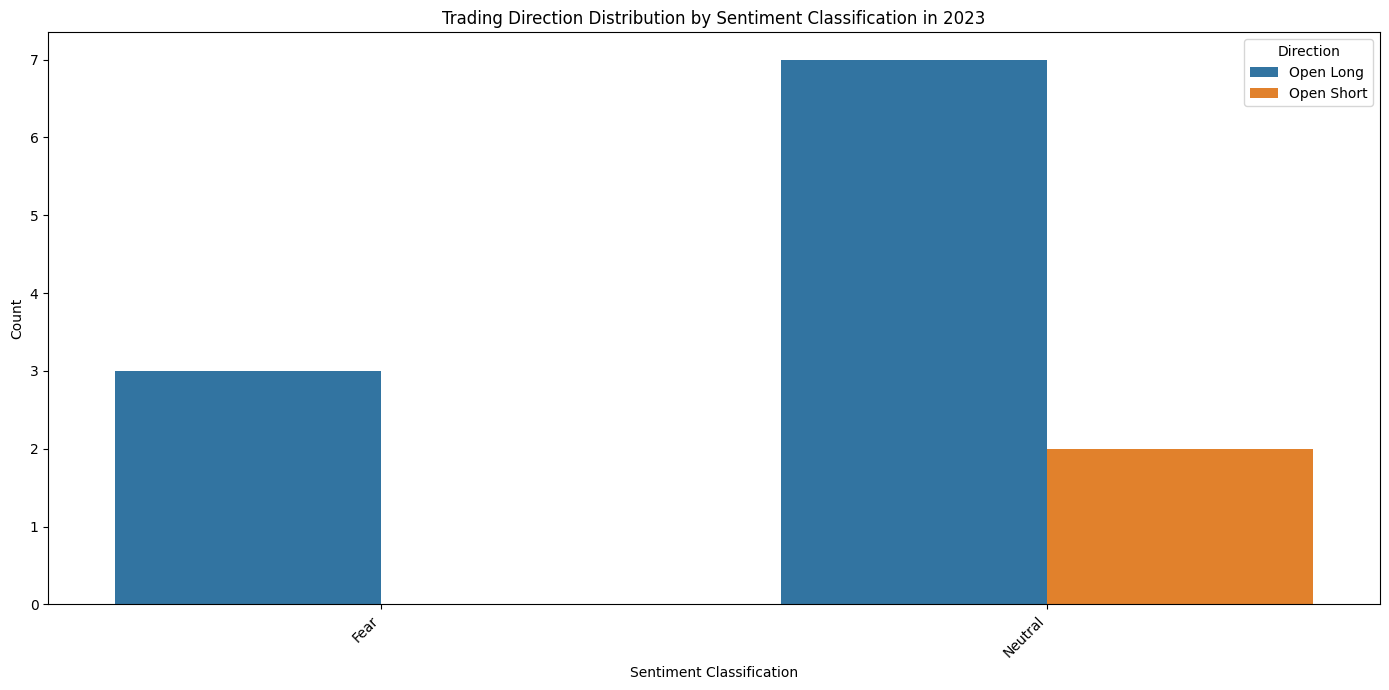

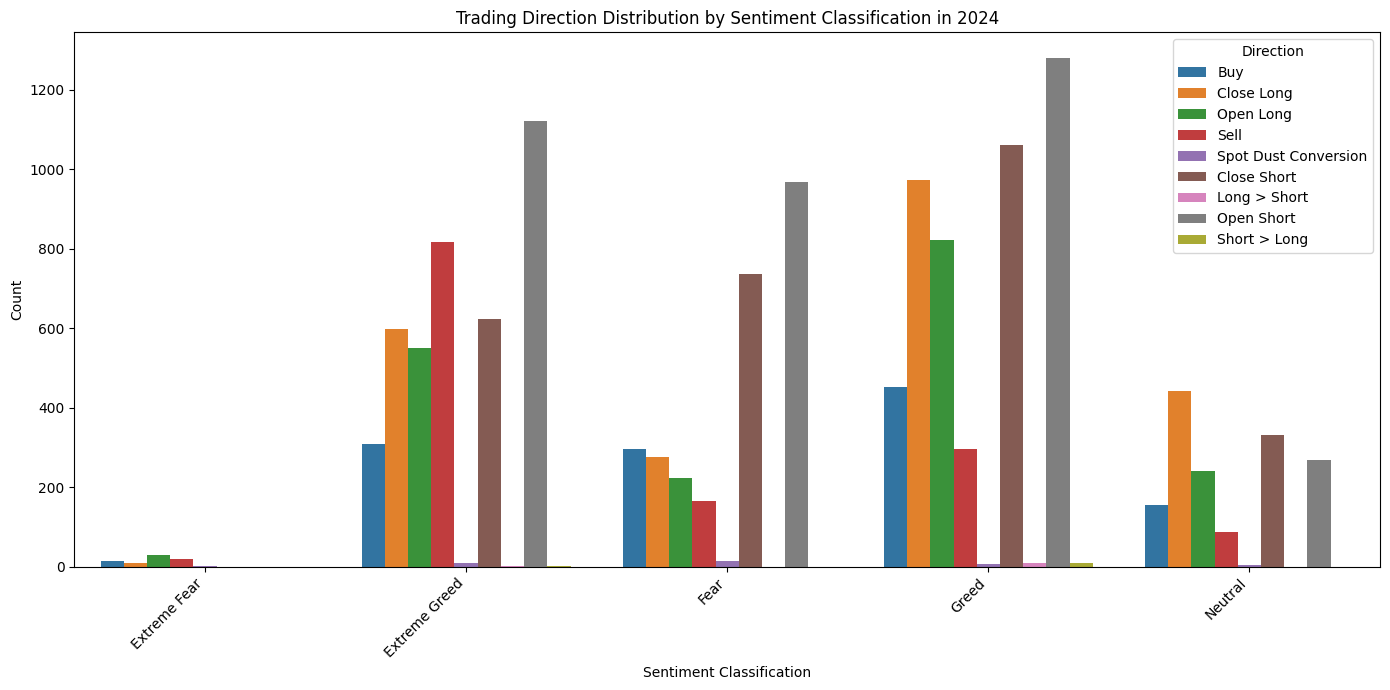

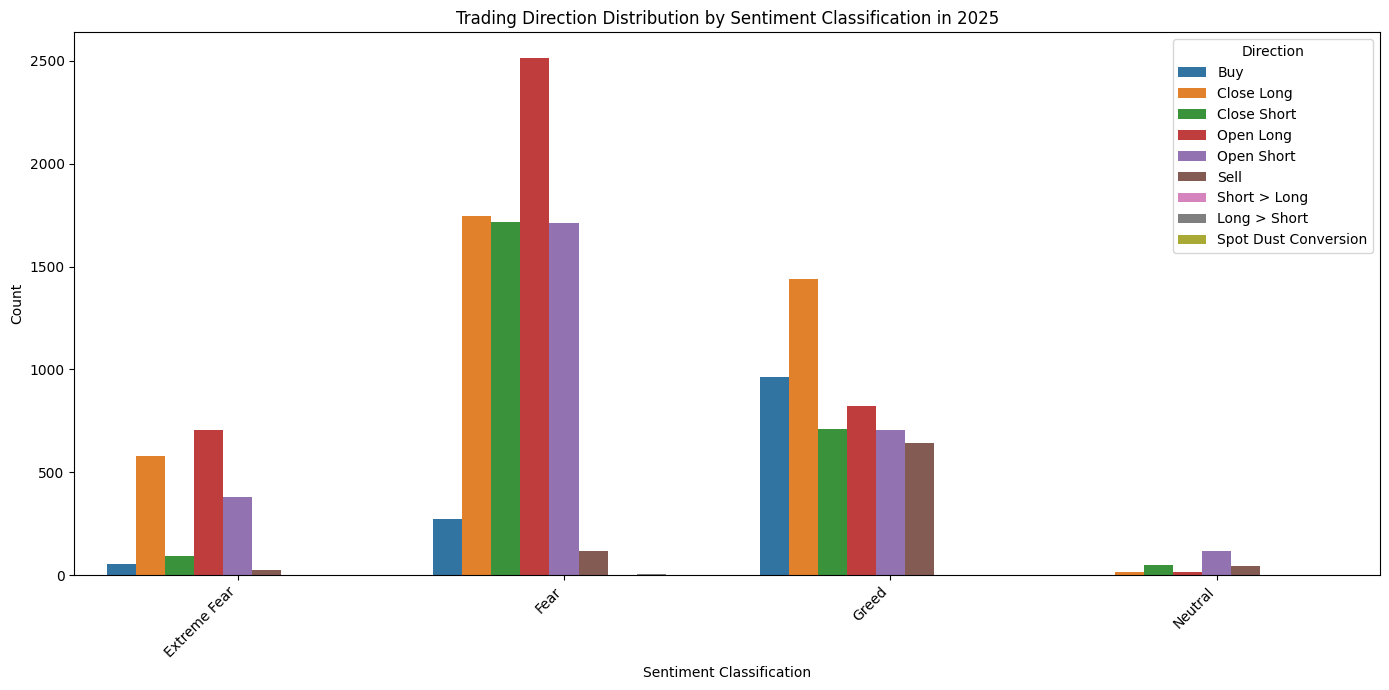

In [17]:
# plot for direction vs classification yearwise
merged_df['year'] = merged_df['date'].dt.year
display(merged_df.head())

# Drop rows with NaN in 'classification' or 'Direction'
plot_df_direction = merged_df.dropna(subset=['classification', 'Direction', 'year'])

# Group by year, classification, and direction and count the occurrences
direction_sentiment_year = plot_df_direction.groupby(['year', 'classification', 'Direction']).size().reset_index(name='count')

# Get unique years
unique_years_direction = plot_df_direction['year'].unique()
unique_years_direction.sort()

for year in unique_years_direction:
    # Filter data for the current year
    direction_sentiment_year_filtered = direction_sentiment_year[direction_sentiment_year['year'] == year]

    # Create a bar plot for the current year
    plt.figure(figsize=(14, 7))
    sns.barplot(data=direction_sentiment_year_filtered, x='classification', y='count', hue='Direction')
    plt.title(f'Trading Direction Distribution by Sentiment Classification in {int(year)}')
    plt.xlabel('Sentiment Classification')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Leverage

/tmp/ipython-input-4233834603.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_price_value = plot_df_price_value.groupby('value_bin')['Execution Price'].mean().reset_index()


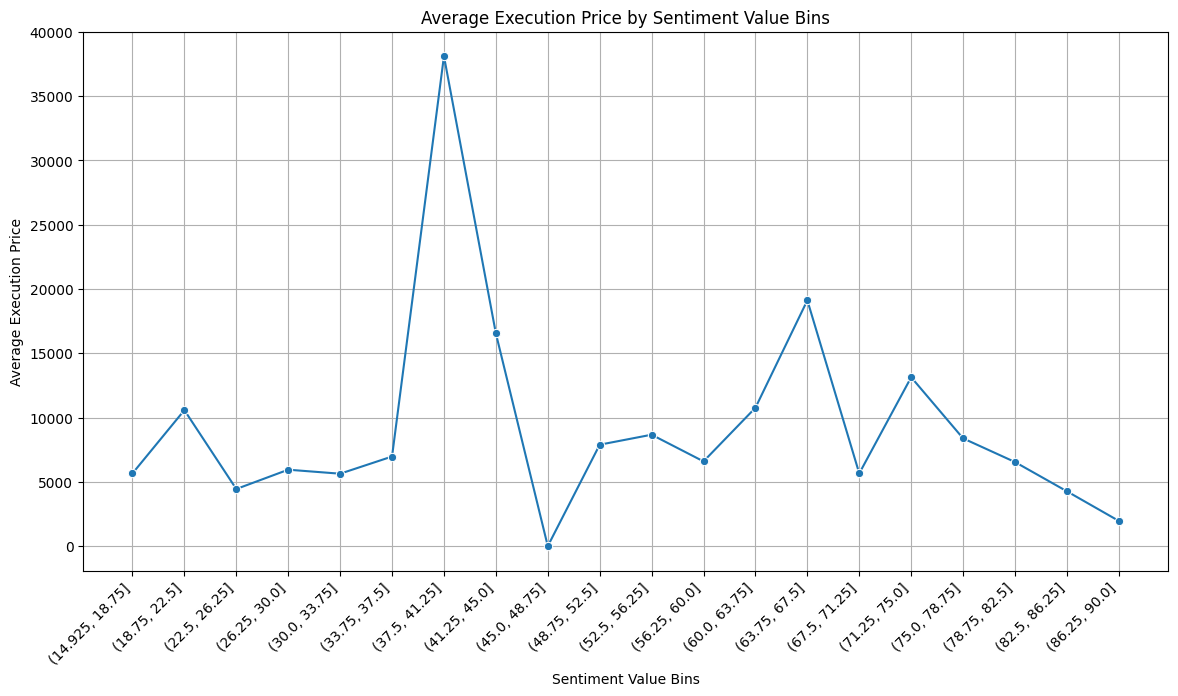

In [18]:
# Line plot of average Execution Price vs binned Sentiment Value

# Drop rows with NaN in 'Execution Price' or 'value' for plotting
plot_df_price_value = merged_df.dropna(subset=['Execution Price', 'value']).copy() # Create a copy to avoid SettingWithCopyWarning

# Create bins for 'value'
plot_df_price_value['value_bin'] = pd.cut(plot_df_price_value['value'], bins=20) # You can adjust the number of bins

# Calculate the mean Execution Price for each bin
binned_price_value = plot_df_price_value.groupby('value_bin')['Execution Price'].mean().reset_index()

# Convert interval to string for plotting
binned_price_value['value_bin_str'] = binned_price_value['value_bin'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(data=binned_price_value, x='value_bin_str', y='Execution Price', marker='o')
plt.title('Average Execution Price by Sentiment Value Bins')
plt.xlabel('Sentiment Value Bins')
plt.ylabel('Average Execution Price')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

/tmp/ipython-input-1886290923.py:10: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=mean_price_classification, x='classification', y='Execution Price', join=False) # Use pointplot without joining points


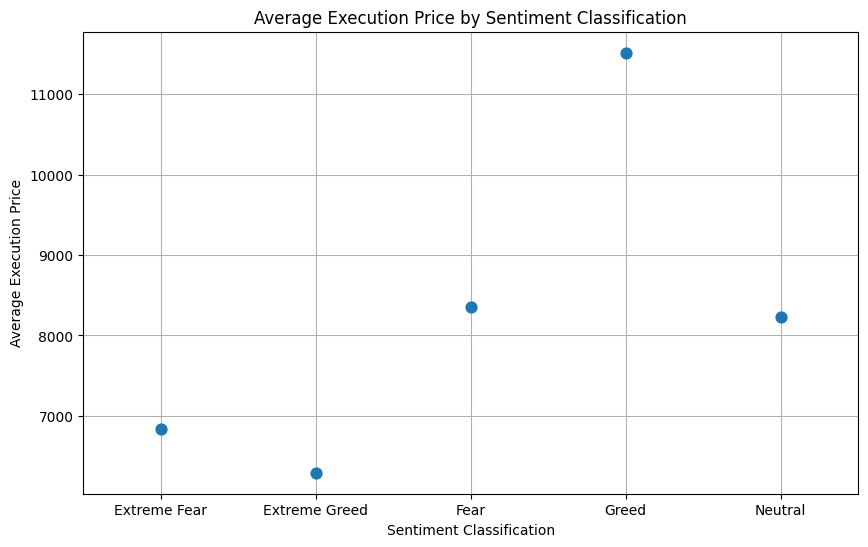

In [19]:
# Point plot of average Execution Price vs Sentiment Classification

# Drop rows with NaN in 'Execution Price' or 'classification' for plotting
plot_df_price_classification = merged_df.dropna(subset=['Execution Price', 'classification'])

# Calculate the mean Execution Price for each classification
mean_price_classification = plot_df_price_classification.groupby('classification')['Execution Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.pointplot(data=mean_price_classification, x='classification', y='Execution Price', join=False) # Use pointplot without joining points
plt.title('Average Execution Price by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Execution Price')
plt.grid(True)
plt.show()

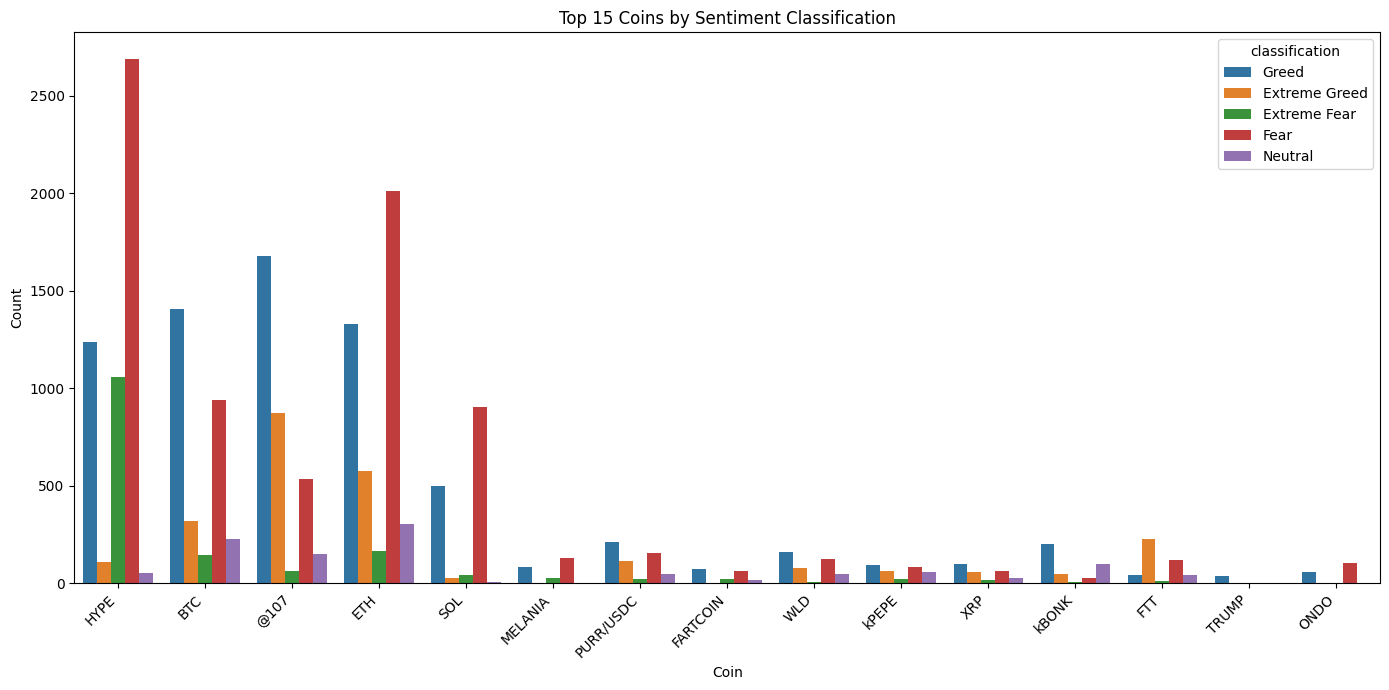

In [24]:
# Top 15 coins countplot coin vs classification
# Get the top 15 coins by count
top_coins = merged_df['Coin'].value_counts().nlargest(15).index
top_df = merged_df[merged_df['Coin'].isin(top_coins)]

# Plot
plt.figure(figsize=(14, 7))
sns.countplot(data=top_df, x='Coin', hue='classification', order=top_coins)
plt.title('Top 15 Coins by Sentiment Classification')
plt.xlabel('Coin')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Volume

In [25]:
columns=['Size Tokens', 'Size USD']

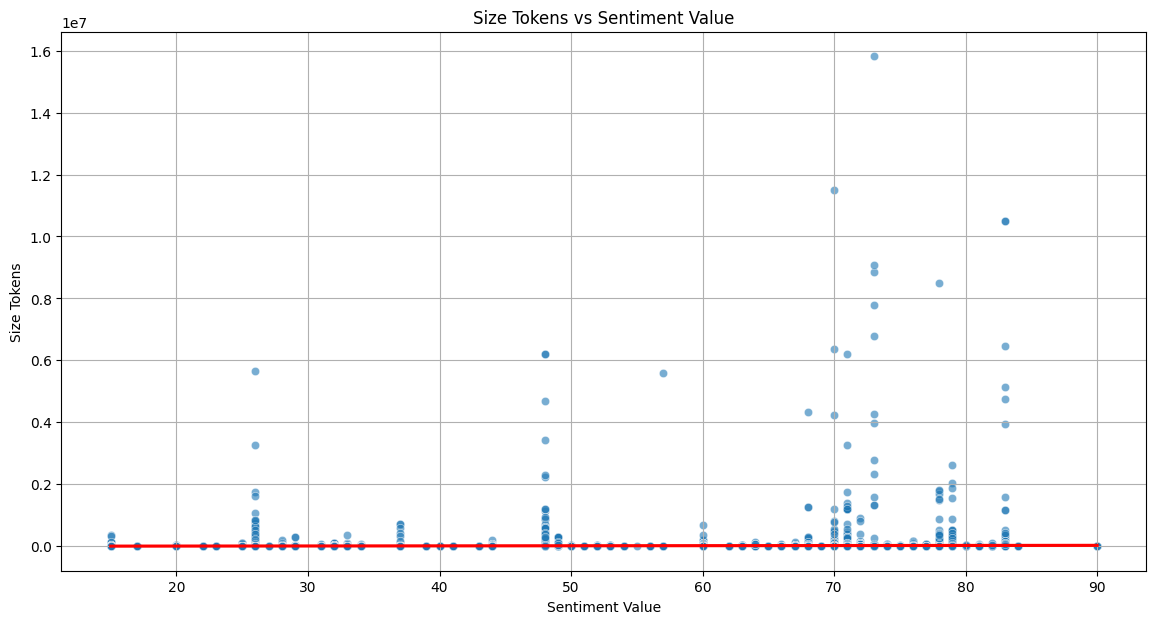

In [26]:
# Scatter plot for Size Tokens vs value

# Drop rows with NaN in 'Size Tokens' or 'value' for plotting
plot_df_volume_value = merged_df.dropna(subset=['Size Tokens', 'value'])

plt.figure(figsize=(14, 7))
sns.scatterplot(data=plot_df_volume_value, x='value', y='Size Tokens', alpha=0.6)
sns.regplot(data=plot_df_volume_value, x='value', y='Size Tokens', scatter=False, color='red') # Add regression line
plt.title('Size Tokens vs Sentiment Value')
plt.xlabel('Sentiment Value')
plt.ylabel('Size Tokens')
plt.grid(True)
plt.show()

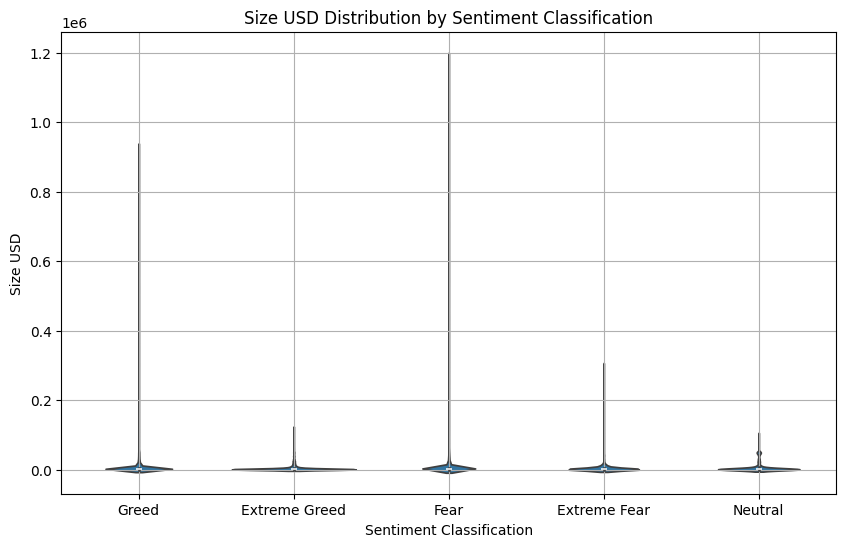

In [28]:
# Box plot for Size Tokens vs classification

# Drop rows with NaN in 'Size Tokens' or 'classification' for plotting
plot_df_volume_classification = merged_df.dropna(subset=['Size USD', 'classification'])

plt.figure(figsize=(10, 6))
sns.violinplot(data=plot_df_volume_classification, x='classification', y='Size USD', inner='box')
plt.title('Size USD Distribution by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Size USD')
plt.grid(True)
plt.show()